In [1]:
#191805060-Semih Utku Polat

#201805051-Utku Enes Baki

#191805063-Emre Karataş

import numpy as np
import pandas as pd

from sklearn import metrics

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l2, l1
from keras.metrics import BinaryAccuracy

In [2]:
datatest = pd.read_csv("/content/sample_data/dataset.txt")
datatest2 = pd.read_csv("/content/sample_data/dataset2.txt")
datatraining = pd.read_csv("/content/sample_data/datatraining.txt")

In [3]:
print(datatest.info())
datatest.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [4]:
print(datatest2.info())
datatest2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [5]:
print(datatraining.info())
datatraining.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [6]:
datatest['date'] = pd.to_datetime(datatest['date'])
datatest2['date'] = pd.to_datetime(datatest2['date'])
datatraining['date'] = pd.to_datetime(datatraining['date'])
datatest.reset_index(drop=True, inplace=True)
datatest2.reset_index(drop=True, inplace=True)
datatraining.reset_index(drop=True, inplace=True)

In [7]:
datatraining.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [8]:
scaler = MinMaxScaler()
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
scaler.fit(np.array(datatraining[columns]))
datatest[columns] = scaler.transform(np.array(datatest[columns]))
datatest2[columns] = scaler.transform(np.array(datatest2[columns]))
datatraining[columns] = scaler.transform(np.array(datatraining[columns]))

       Temperature     Humidity        Light          CO2  HumidityRatio
count  8143.000000  8143.000000  8143.000000  8143.000000    8143.000000
mean      0.387341     0.401676     0.077292     0.119942       0.312576
std       0.243281     0.247233     0.125947     0.194536       0.224186
min       0.000000     0.000000     0.000000     0.000000       0.000000
25%       0.167464     0.154431     0.000000     0.016246       0.106304
50%       0.332536     0.423623     0.000000     0.025220       0.296338
75%       0.571770     0.616307     0.165795     0.139925       0.441308
max       1.000000     1.000000     1.000000     1.000000       1.000000


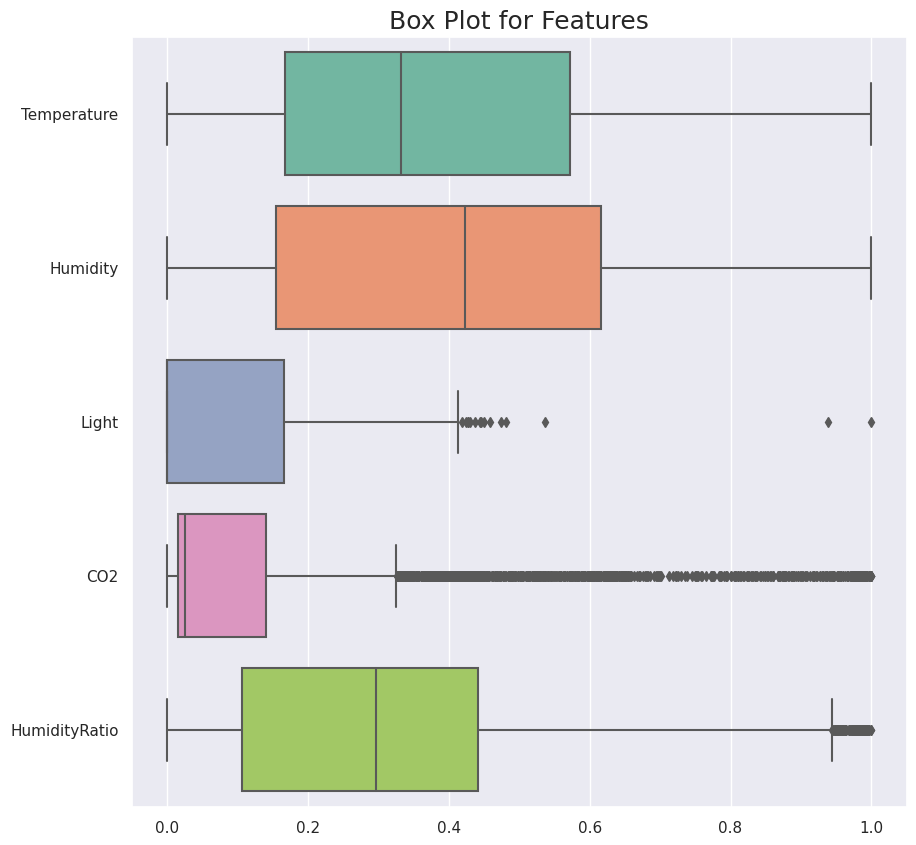

In [9]:
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=datatraining.drop(['date', 'Occupancy'],axis=1), orient="h", palette="Set2")
print(datatraining.drop(['date', 'Occupancy'],axis=1).describe())

<ipython-input-10-85b9e1f5c6c9>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



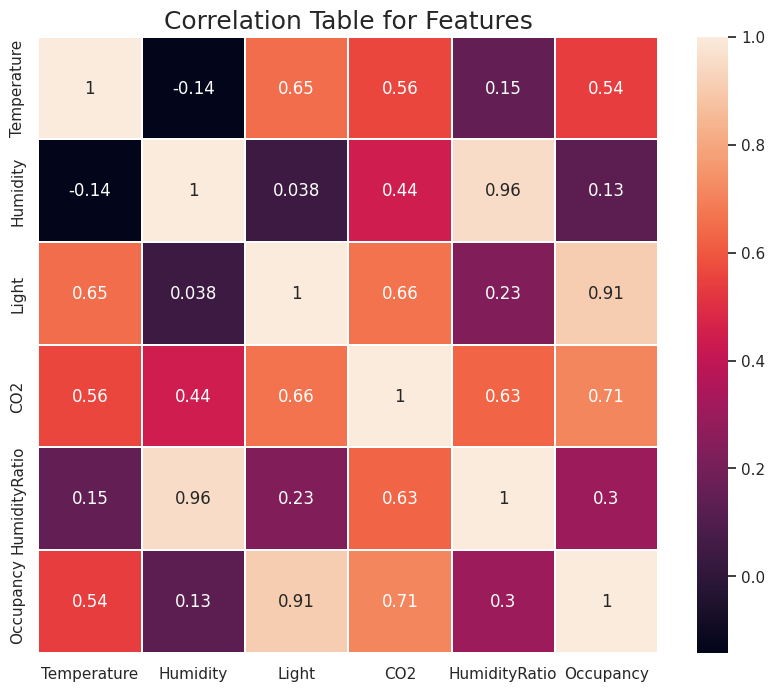

In [10]:
plt.figure(figsize=(10,8))
plt.title('Correlation Table for Features', fontdict={'fontsize':18})
ax = sns.heatmap(datatraining.corr(), annot=True, linewidths=.2)

In [11]:
data = datatraining.copy()
data.Occupancy = data.Occupancy.astype(str)
fig = px.scatter_3d(data, x='Temperature', y='Humidity', z='CO2', size='Light', color='Occupancy', color_discrete_map={'1':'red', '0':'blue'})
fig.update_layout(scene_zaxis_type="log", title={'text': "Features and Occupancy", 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
iplot(fig)

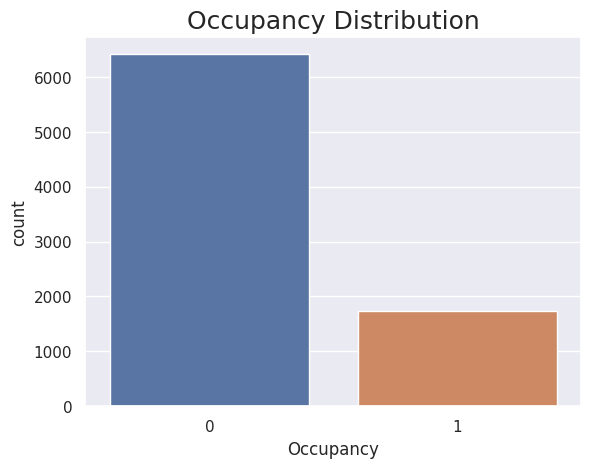

In [12]:
sns.set(style="darkgrid")
plt.title("Occupancy Distribution", fontdict={'fontsize':18})
ax = sns.countplot(x="Occupancy", data=datatraining)

In [13]:
hours_1 = []
hours_0 = []
for date in datatraining[datatraining['Occupancy'] == 1]['date']:
    hours_1.append(date.hour)
for date in datatraining[datatraining['Occupancy'] == 0]['date']:
    hours_0.append(date.hour)

<ipython-input-14-0c4aafc88843>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-14-0c4aafc88843>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




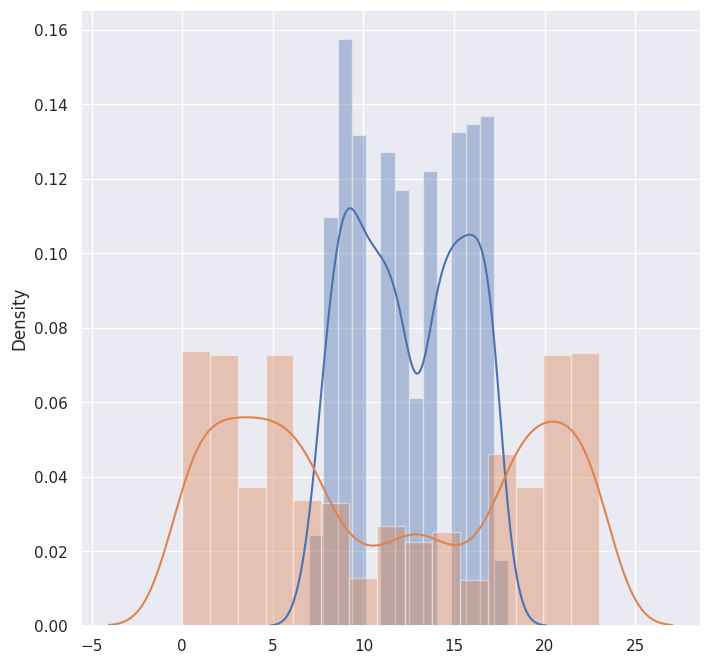

In [14]:
plt.figure(figsize=(8,8))
ax = sns.distplot(hours_1)
ax = sns.distplot(hours_0)

In [15]:
datatest['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in datatest['date']]
datatest2['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in datatest2['date']]
datatraining['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in datatraining['date']]
datatraining.sample(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,period_of_day
2209,2015-02-06 06:40:00,0.316587,0.081424,0.000000,0.012327,0.015040,0,0
2553,2015-02-06 12:23:59,0.660287,0.157113,0.316232,0.240085,0.153636,1,1
2241,2015-02-06 07:12:00,0.287081,0.082914,0.000000,0.013771,0.010845,0,1
3604,2015-02-07 05:55:00,0.167464,0.115991,0.000000,0.018103,0.016628,0,0
4489,2015-02-07 20:39:59,0.239234,0.408761,0.000000,0.018722,0.280149,0,0
103,2015-02-04 19:34:00,0.741627,0.465080,0.000000,0.093919,0.471431,0,0
1491,2015-02-05 18:42:00,0.555821,0.258725,0.000000,0.155707,0.225062,0,0
5682,2015-02-08 16:33:00,0.143541,0.451224,0.017137,0.002321,0.291314,0,1
8078,2015-02-10 08:29:00,0.308612,0.735501,0.000000,0.023983,0.583042,0,1
7893,2015-02-10 05:23:59,0.287081,0.726562,0.000000,0.021198,0.568082,0,0


In [16]:
# Classification with Machine Learning Methods
X_train = datatraining.drop(columns=['date', 'Occupancy'], axis=1)
y_train = datatraining['Occupancy']
X_validation = datatest.drop(columns=['date', 'Occupancy'], axis=1)
y_validation = datatest['Occupancy']
X_test = datatest2.drop(columns=['date', 'Occupancy'], axis=1)
y_test = datatest2['Occupancy']

In [17]:
# KNN (K-Nearest Neighbors)
n_neighbors_list = [7,15,45,135]
weights_list = ['uniform', 'distance']
metric_list = ['euclidean', 'manhattan']
accuracies = {}
for n in n_neighbors_list:
    for weight in weights_list:
        for metric in metric_list:
            knn_model = KNeighborsClassifier(n_neighbors=n, weights=weight, metric=metric)
            knn_model.fit(X_train, y_train)
            accuracy = knn_model.score(X_validation, y_validation)
            accuracies[str(n)+"/"+weight+"/"+metric] = accuracy

In [18]:
plotdata = pd.DataFrame()
plotdata['Parameters'] = accuracies.keys()
plotdata['Accuracy'] = accuracies.values()
fig = px.line(plotdata, x="Parameters", y="Accuracy")
fig.update_layout(title={'text': "Accuracies for Different Hyper-Parameters", 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
iplot(fig)

In [19]:
# KNN Confusion Matrix
knn_model = KNeighborsClassifier(n_neighbors=135)
knn_model.fit(X_train, y_train)
knn_predict_train = knn_model.predict(X_train)
knn_predict_valid = knn_model.predict(X_validation)
knn_predict_test = knn_model.predict(X_test)
knn_accuracy_train = metrics.accuracy_score(y_train, knn_predict_train)
knn_accuracy_valid = metrics.accuracy_score(y_validation, knn_predict_valid)
knn_accuracy_test = metrics.accuracy_score(y_test, knn_predict_test)
print(f"K-Nearest Neighbors Training Accuracy: {knn_accuracy_train:.4f}")
print(f"K-Nearest Neighbors Validation Accuracy: {knn_accuracy_valid:.4f}")
print(f"K-Nearest Neighbors Test Accuracy: {knn_accuracy_test:.4f}")

K-Nearest Neighbors Training Accuracy: 0.9742
K-Nearest Neighbors Validation Accuracy: 0.9636
K-Nearest Neighbors Test Accuracy: 0.9313


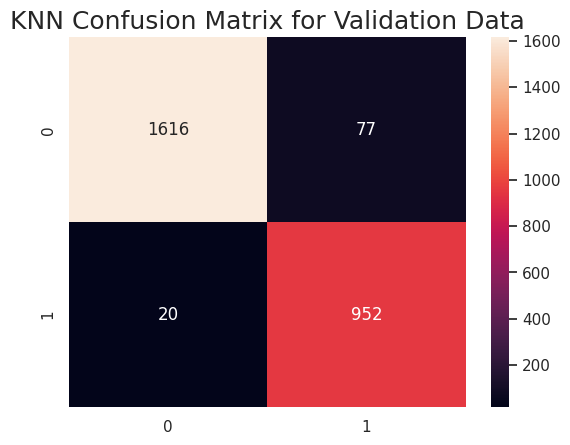

In [20]:
y_pred = knn_model.predict(X_validation)
plt.title("KNN Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")

In [21]:
# SVM (Support-Vector Machine)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predict_train = svm_model.predict(X_train)
svm_predict_valid = svm_model.predict(X_validation)
svm_predict_test = svm_model.predict(X_test)
svm_accuracy_train = metrics.accuracy_score(y_train, svm_predict_train)
svm_accuracy_valid = metrics.accuracy_score(y_validation, svm_predict_valid)
svm_accuracy_test = metrics.accuracy_score(y_test, svm_predict_test)
print(f"Support-Vector Machine Training Accuracy: {svm_accuracy_train:.4f}")
print(f"Support-Vector Machine Validation Accuracy: {svm_accuracy_valid:.4f}")
print(f"Support-Vector Machine Test Accuracy: {svm_accuracy_test:.4f}")

Support-Vector Machine Training Accuracy: 0.9887
Support-Vector Machine Validation Accuracy: 0.9782
Support-Vector Machine Test Accuracy: 0.9838


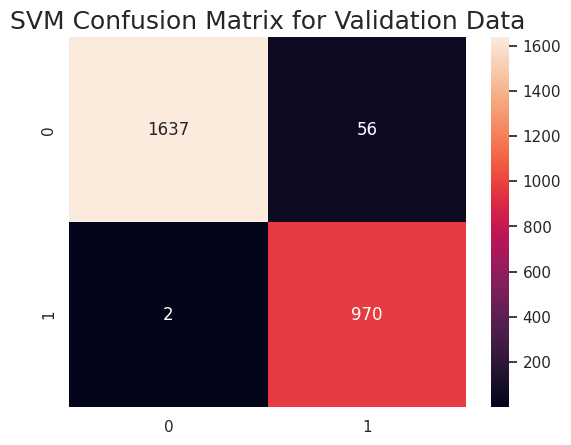

In [22]:
# SVM Confusion Matrix
y_pred = svm_model.predict(X_validation)
plt.title("SVM Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")

In [23]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.1 MB/s eta 0:00:00


In [24]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Train a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
rf_predict_train = rf_model.predict(X_train)
rf_predict_validation = rf_model.predict(X_validation)
rf_predict_test = rf_model.predict(X_test)
rf_accuracy_train = metrics.accuracy_score(y_train, rf_predict_train)
rf_accuracy_valid = metrics.accuracy_score(y_validation, rf_predict_validation)
rf_accuracy_test = metrics.accuracy_score(y_test, rf_predict_test)
print(f"Random Forest Training Accuracy: {rf_accuracy_train:.4f}")
print(f"Random Forest Validation Accuracy: {rf_accuracy_valid:.4f}")
print(f"Random Forest Test Accuracy: {rf_accuracy_test:.4f}\n")

# Train an AdaBoost classifier
adab_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adab_model.fit(X_train, y_train)
ab_predict_train = adab_model.predict(X_train)
ab_predict_validation = adab_model.predict(X_validation)
ab_predict_test = adab_model.predict(X_test)
ab_accuracy_train = metrics.accuracy_score(y_train, ab_predict_train)
ab_accuracy_validation = metrics.accuracy_score(y_validation, ab_predict_validation)
ab_accuracy_test = metrics.accuracy_score(y_test, ab_predict_test)
print(f"AdaBoost Training Accuracy: {ab_accuracy_train:.4f}")
print(f"AdaBoost Validation Accuracy: {ab_accuracy_validation:.4f}")
print(f"AdaBoost Test Accuracy: {ab_accuracy_test:.4f}\n")

# Train a CatBoost classifier
cat_model = CatBoostClassifier(iterations=100, max_depth=5, random_seed=42, verbose=False)
cat_model.fit(X_train, y_train)
cat_predict_train = cat_model.predict(X_train)
cat_predict_validation = cat_model.predict(X_validation)
cat_predict_test = cat_model.predict(X_test)
cat_accuracy_train = metrics.accuracy_score(y_train, cat_predict_train)
cat_accuracy_validation = metrics.accuracy_score(y_validation, cat_predict_validation)
cat_accuracy_test = metrics.accuracy_score(y_test, cat_predict_test)
print(f"CatBoost Training Accuracy: {cat_accuracy_train:.4f}")
print(f"CatBoost Validation Accuracy: {cat_accuracy_validation:.4f}")
print(f"CatBoost Test Accuracy: {cat_accuracy_test:.4f}\n")

# Train an XGBoost classifier
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, random_state = 42)
xgb_model.fit(X_train, y_train)
xgb_predict_train = xgb_model.predict(X_train)
xgb_predict_validation = xgb_model.predict(X_validation)
xgb_predict_test = xgb_model.predict(X_test)
xgb_accuracy_train = metrics.accuracy_score(y_train, xgb_predict_train)
xgb_accuracy_validation = metrics.accuracy_score(y_validation, xgb_predict_validation)
xgb_accuracy_test = metrics.accuracy_score(y_test, xgb_predict_test)
print(f"XGBoost Training Accuracy: {xgb_accuracy_train:.4f}")
print(f"XGBoost Validation Accuracy: {xgb_accuracy_validation:.4f}")
print(f"XGBoost Test Accuracy: {xgb_accuracy_test:.4f}\n")

# Train a LightGBM classifier
lightgbm_model = LGBMClassifier(n_estimators=100, max_depth=5, random_state=42)
lightgbm_model.fit(X_train, y_train)
lightgbm_predict_train = lightgbm_model.predict(X_train)
lightgbm_predict_validation = lightgbm_model.predict(X_validation)
lightgbm_predict_test = lightgbm_model.predict(X_test)
lightgbm_accuracy_train = metrics.accuracy_score(y_train, lightgbm_predict_train)
lightgbm_accuracy_validation = metrics.accuracy_score(y_validation, lightgbm_predict_validation)
lightgbm_accuracy_test = metrics.accuracy_score(y_test, lightgbm_predict_test)
print(f"LightGBM Training Accuracy: {lightgbm_accuracy_train:.4f}")
print(f"LightGBM Validation Accuracy: {lightgbm_accuracy_validation:.4f}")
print(f"LightGBM Test Accuracy: {lightgbm_accuracy_test:.4f}")

Random Forest Training Accuracy: 0.9901
Random Forest Validation Accuracy: 0.9779
Random Forest Test Accuracy: 0.9782

AdaBoost Training Accuracy: 0.9963
AdaBoost Validation Accuracy: 0.9670
AdaBoost Test Accuracy: 0.9559

CatBoost Training Accuracy: 0.9968
CatBoost Validation Accuracy: 0.9193
CatBoost Test Accuracy: 0.9500

XGBoost Training Accuracy: 0.9999
XGBoost Validation Accuracy: 0.9433
XGBoost Test Accuracy: 0.9530

LightGBM Training Accuracy: 0.9986
LightGBM Validation Accuracy: 0.9482
LightGBM Test Accuracy: 0.9334


In [25]:
# Classification with Neural Networks

# NN without regularization
model1 = Sequential()
model1.add(Dense(32, activation='relu', input_dim=6))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

print()
print("NN 1 Accuracy:", history1.history['accuracy'][-1])
print("NN 1 Validation Accuracy:", history1.history['val_accuracy'][-1])

Epoch 1/50
255/255 [==============================] - 3s 5ms/step - loss: 0.3038 - accuracy: 0.9257 - val_loss: 0.1381 - val_accuracy: 0.9482
Epoch 2/50
255/255 [==============================] - 1s 2ms/step - loss: 0.0864 - accuracy: 0.9748 - val_loss: 0.0945 - val_accuracy: 0.9719
Epoch 3/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0644 - accuracy: 0.9813 - val_loss: 0.0827 - val_accuracy: 0.9764
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0569 - accuracy: 0.9838 - val_loss: 0.0931 - val_accuracy: 0.9662
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0529 - accuracy: 0.9855 - val_loss: 0.0761 - val_accuracy: 0.9767
Epoch 6/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0500 - accuracy: 0.9869 - val_loss: 0.0743 - val_accuracy: 0.9779
Epoch 7/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0477 - accuracy: 0.9872 - val_loss: 0.0748 - val_accuracy: 0.9782
Epoch 

In [26]:
# NN with 0.2 dropout ratio before the hidden layer.
model2 = Sequential()
model2.add(Dense(32, activation='relu', input_dim=6))
model2.add(Dropout(0.2))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

print()
print("NN 2 Accuracy:", history2.history['accuracy'][-1])
print("NN 2 Validation Accuracy:", history2.history['val_accuracy'][-1])

Epoch 1/50
255/255 [==============================] - 1s 3ms/step - loss: 0.3889 - accuracy: 0.8437 - val_loss: 0.2044 - val_accuracy: 0.9287
Epoch 2/50
255/255 [==============================] - 1s 2ms/step - loss: 0.1259 - accuracy: 0.9597 - val_loss: 0.1074 - val_accuracy: 0.9580
Epoch 3/50
255/255 [==============================] - 1s 2ms/step - loss: 0.0843 - accuracy: 0.9753 - val_loss: 0.0950 - val_accuracy: 0.9636
Epoch 4/50
255/255 [==============================] - 1s 2ms/step - loss: 0.0682 - accuracy: 0.9797 - val_loss: 0.0879 - val_accuracy: 0.9719
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0608 - accuracy: 0.9838 - val_loss: 0.0793 - val_accuracy: 0.9767
Epoch 6/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0535 - accuracy: 0.9855 - val_loss: 0.0774 - val_accuracy: 0.9782
Epoch 7/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0522 - accuracy: 0.9872 - val_loss: 0.0764 - val_accuracy: 0.9782
Epoch 

In [27]:
# NN with L1(Lasso) regularization
model3 = Sequential()
model3.add(Dense(32, activation='relu', input_dim=6, kernel_regularizer=l1(l=0.01)))
model3.add(Dense(16, activation='relu', kernel_regularizer=l1(l=0.01)))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

print()
print("NN 3 Accuracy:", history3.history['accuracy'][-1])
print("NN 3 Validation Accuracy:", history3.history['val_accuracy'][-1])

Epoch 1/50
255/255 [==============================] - 1s 3ms/step - loss: 1.1643 - accuracy: 0.7937 - val_loss: 0.7279 - val_accuracy: 0.6353
Epoch 2/50
255/255 [==============================] - 1s 2ms/step - loss: 0.4785 - accuracy: 0.8812 - val_loss: 0.4215 - val_accuracy: 0.9144
Epoch 3/50
255/255 [==============================] - 1s 2ms/step - loss: 0.3598 - accuracy: 0.9555 - val_loss: 0.3398 - val_accuracy: 0.9358
Epoch 4/50
255/255 [==============================] - 1s 2ms/step - loss: 0.3077 - accuracy: 0.9632 - val_loss: 0.2970 - val_accuracy: 0.9456
Epoch 5/50
255/255 [==============================] - 1s 2ms/step - loss: 0.2740 - accuracy: 0.9667 - val_loss: 0.2671 - val_accuracy: 0.9565
Epoch 6/50
255/255 [==============================] - 1s 2ms/step - loss: 0.2472 - accuracy: 0.9710 - val_loss: 0.2532 - val_accuracy: 0.9475
Epoch 7/50
255/255 [==============================] - 1s 2ms/step - loss: 0.2249 - accuracy: 0.9734 - val_loss: 0.2320 - val_accuracy: 0.9550
Epoch 

In [28]:
# NN with L2(Ridge) Regularization
model4 = Sequential()
model4.add(Dense(32, activation='relu', input_dim=6, kernel_regularizer=l2(l=0.01)))
model4.add(Dense(16, activation='relu', kernel_regularizer=l2(l=0.01)))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

print()
print("NN 4 Accuracy:", history4.history['accuracy'][-1])
print("NN 4 Validation Accuracy:", history4.history['val_accuracy'][-1])

Epoch 1/50
255/255 [==============================] - 2s 7ms/step - loss: 0.5376 - accuracy: 0.8928 - val_loss: 0.3329 - val_accuracy: 0.9283
Epoch 2/50
255/255 [==============================] - 1s 2ms/step - loss: 0.2511 - accuracy: 0.9681 - val_loss: 0.2436 - val_accuracy: 0.9355
Epoch 3/50
255/255 [==============================] - 1s 3ms/step - loss: 0.2020 - accuracy: 0.9709 - val_loss: 0.2015 - val_accuracy: 0.9516
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.1786 - accuracy: 0.9754 - val_loss: 0.1849 - val_accuracy: 0.9568
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.1645 - accuracy: 0.9776 - val_loss: 0.1718 - val_accuracy: 0.9681
Epoch 6/50
255/255 [==============================] - 1s 3ms/step - loss: 0.1551 - accuracy: 0.9790 - val_loss: 0.1679 - val_accuracy: 0.9583
Epoch 7/50
255/255 [==============================] - 1s 2ms/step - loss: 0.1475 - accuracy: 0.9799 - val_loss: 0.1591 - val_accuracy: 0.9647
Epoch 

In [29]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(loss1)), y=loss1, name='Training Loss without Regularization', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss1)), y=val_loss1, name='Validation Loss without Regularization', line = dict(color='firebrick')))

fig.add_trace(go.Scatter(x=np.arange(len(loss2)), y=loss2, name='Training Loss with Dropout', line=dict(color='royalblue', dash='dash')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss2)), y=val_loss2, name='Validation Loss with Dropout', line = dict(color='firebrick', dash='dash')))

fig.add_trace(go.Scatter(x=np.arange(len(loss3)), y=loss3, name='Training Loss with L1 Regularization', line=dict(color='royalblue', dash='dot')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss3)), y=val_loss3, name='Validation Loss with L1 Regularization', line = dict(color='firebrick', dash='dot')))

fig.add_trace(go.Scatter(x=np.arange(len(loss4)), y=loss4, name='Training Loss with L2 Regularization', line=dict(color='royalblue', dash='longdashdot')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss4)), y=val_loss4, name='Validation Loss with L2 Regularization', line = dict(color='firebrick', dash='longdashdot')))

fig.update_layout(xaxis_title='Epochs', yaxis_title='Loss', title={'text': "Training and Validation Losses for Different Models", 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
iplot(fig)

In [30]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=6, kernel_regularizer=l2(l=0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(l=0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

print()
print("NN Test Accuracy:", history.history['accuracy'][-1])

Epoch 1/50
255/255 [==============================] - 1s 2ms/step - loss: 0.5841 - accuracy: 0.8434
Epoch 2/50
255/255 [==============================] - 1s 2ms/step - loss: 0.2587 - accuracy: 0.9451
Epoch 3/50
255/255 [==============================] - 0s 2ms/step - loss: 0.1997 - accuracy: 0.9635
Epoch 4/50
255/255 [==============================] - 1s 2ms/step - loss: 0.1791 - accuracy: 0.9646
Epoch 5/50
255/255 [==============================] - 0s 2ms/step - loss: 0.1614 - accuracy: 0.9740
Epoch 6/50
255/255 [==============================] - 0s 2ms/step - loss: 0.1528 - accuracy: 0.9758
Epoch 7/50
255/255 [==============================] - 0s 2ms/step - loss: 0.1435 - accuracy: 0.9792
Epoch 8/50
255/255 [==============================] - 1s 2ms/step - loss: 0.1393 - accuracy: 0.9783
Epoch 9/50
255/255 [==============================] - 1s 3ms/step - loss: 0.1344 - accuracy: 0.9811
Epoch 10/50
255/255 [==============================] - 1s 3ms/step - loss: 0.1302 - accuracy: 0.9816

In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
train_data = pd.read_csv("/content/sample_data/datatraining.txt")
val_data = pd.read_csv("/content/sample_data/dataset.txt")
test_data = pd.read_csv("/content/sample_data/dataset2.txt")

# Extract the features and labels
train_features = train_data.iloc[:, 2:7].values
train_labels = train_data.iloc[:, -1].values
val_features = val_data.iloc[:, 2:7].values
val_labels = val_data.iloc[:, -1].values
test_features = test_data.iloc[:, 2:7].values
test_labels = test_data.iloc[:, -1].values

# Normalize the features
mean = np.mean(train_features, axis=0)
std = np.std(train_features, axis=0)
train_features = (train_features - mean) / std
val_features = (val_features - mean) / std
test_features = (test_features - mean) / std

# Reshape the features
train_features = train_features.reshape(-1, 5, 1, 1)
val_features = val_features.reshape(-1, 5, 1, 1)
test_features = test_features.reshape(-1, 5, 1, 1)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 1), activation='relu', padding='same', input_shape=(5, 1, 1)),
    layers.MaxPooling2D((2, 1)),
    layers.Conv2D(64, (3, 1), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 1)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping
model.fit(train_features, train_labels, epochs=30, validation_data=(val_features, val_labels), callbacks=[early_stop])

# Predict the test labels using the trained model
cnn_predict_test = model.predict(test_features)
cnn_predict_test = np.where(cnn_predict_test > 0.5, 1, 0)

# Calculate the accuracy of the model on the test data
cnn_test_loss, cnn_test_acc = model.evaluate(test_features, test_labels)
print(f"CNN Test accuracy: {cnn_test_acc}")

Epoch 1/30
255/255 [==============================] - 2s 4ms/step - loss: 0.0864 - accuracy: 0.9801 - val_loss: 0.0055 - val_accuracy: 0.9996
Epoch 2/30
255/255 [==============================] - 1s 4ms/step - loss: 0.0020 - accuracy: 0.9999 - val_loss: 0.0016 - val_accuracy: 0.9996
Epoch 3/30
255/255 [==============================] - 2s 6ms/step - loss: 7.4122e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 0.9992
Epoch 4/30
255/255 [==============================] - 1s 4ms/step - loss: 2.6542e-04 - accuracy: 1.0000 - val_loss: 4.0515e-04 - val_accuracy: 1.0000
Epoch 5/30
255/255 [==============================] - 1s 3ms/step - loss: 2.4036e-04 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9989
Epoch 6/30
255/255 [==============================] - 1s 3ms/step - loss: 7.5389e-05 - accuracy: 1.0000 - val_loss: 3.8162e-04 - val_accuracy: 1.0000
Epoch 7/30
255/255 [==============================] - 1s 3ms/step - loss: 6.2429e-05 - accuracy: 1.0000 - val_loss: 0.0016 -

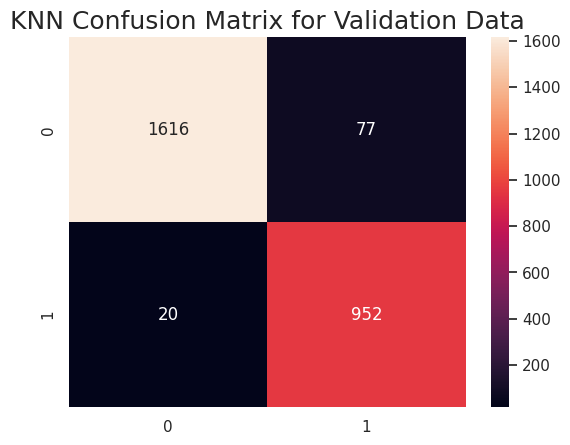

In [32]:
#KNN Confusion Matrix
y_pred = knn_model.predict(X_validation)
plt.title("KNN Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")

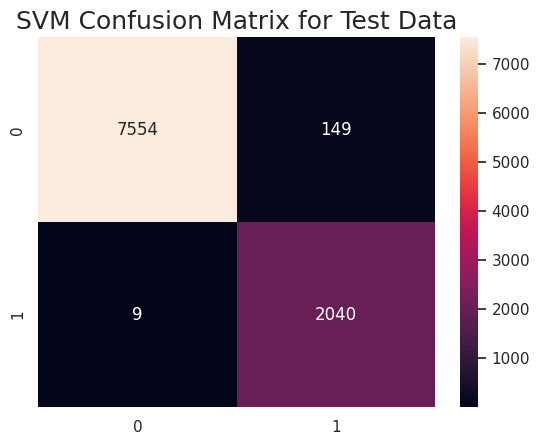

In [33]:
# SVM Confusion Matrix
plt.title("SVM Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, svm_predict_test), annot=True, fmt="d")

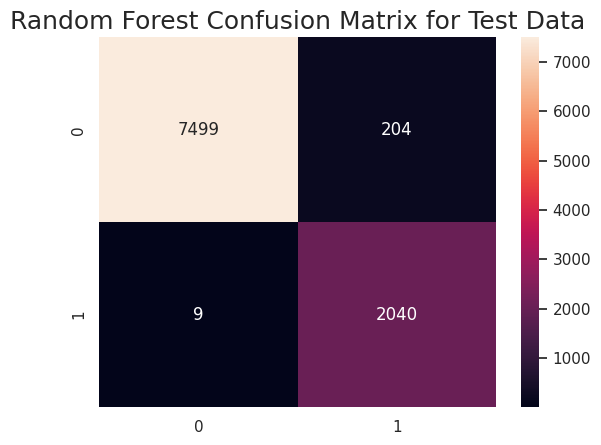

In [34]:
# Random Forest Confusion Matrix
plt.title("Random Forest Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, rf_predict_test), annot=True, fmt="d")

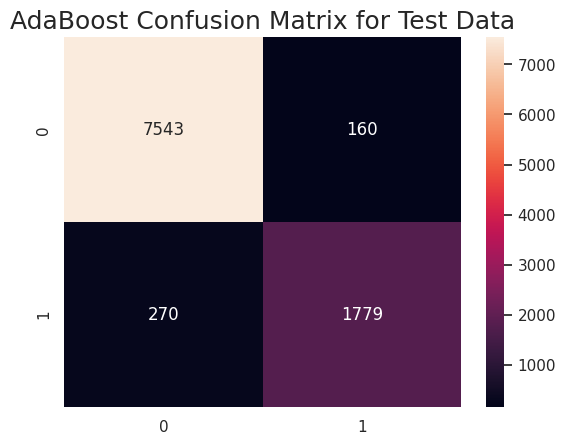

In [35]:
# AdaBoost Confusion Matrix
plt.title("AdaBoost Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, ab_predict_test), annot=True, fmt="d")

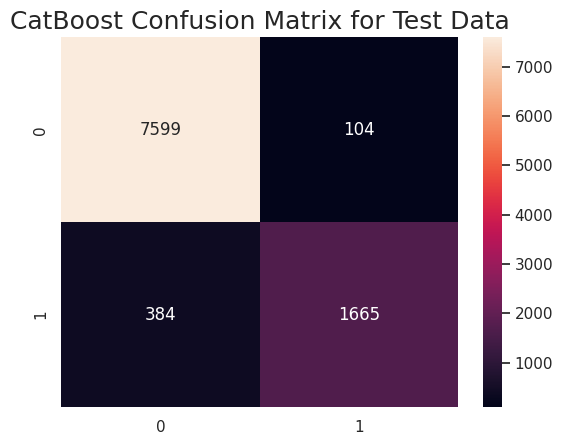

In [36]:
# CatBoost Confusion Matrix
plt.title("CatBoost Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, cat_predict_test), annot=True, fmt="d")

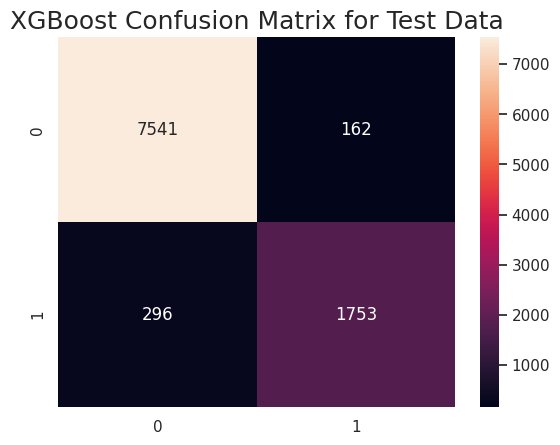

In [37]:
# XGBoost Confusion Matrix
plt.title("XGBoost Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, xgb_predict_test), annot=True, fmt="d")

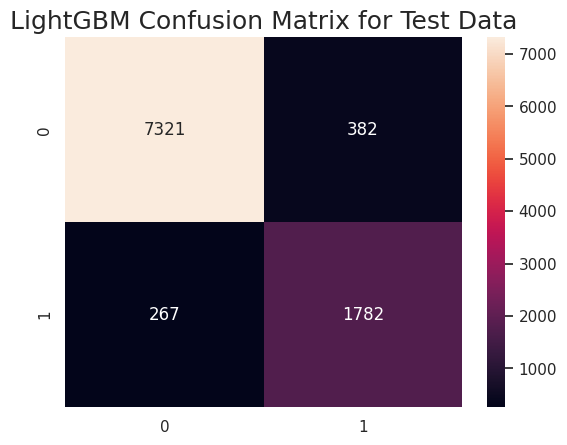

In [38]:
# LightGBM Confusion Matrix
plt.title("LightGBM Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, lightgbm_predict_test), annot=True, fmt="d")

305/305 [==============================] - 1s 2ms/step


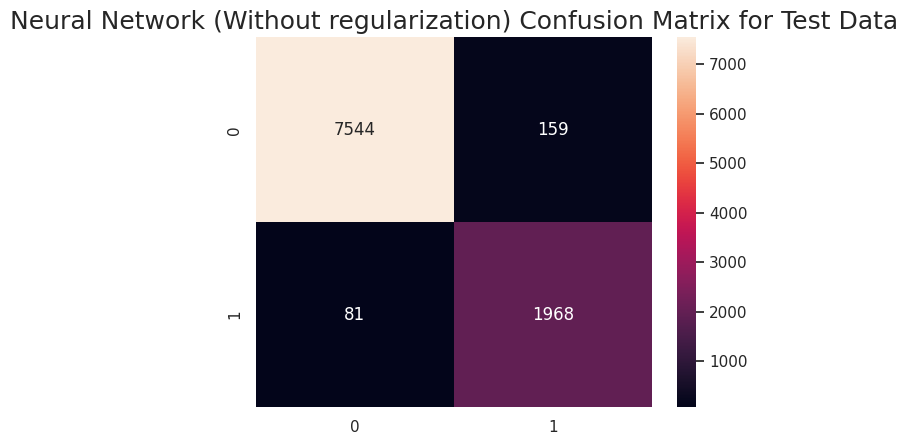

In [39]:
# NN (Without regularization) Confusion Matrix
threshold = 0.6
y_pred = [1 if i >= threshold else 0 for i in model2.predict(X_test)]
plt.title("Neural Network (Without regularization) Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

305/305 [==============================] - 0s 2ms/step


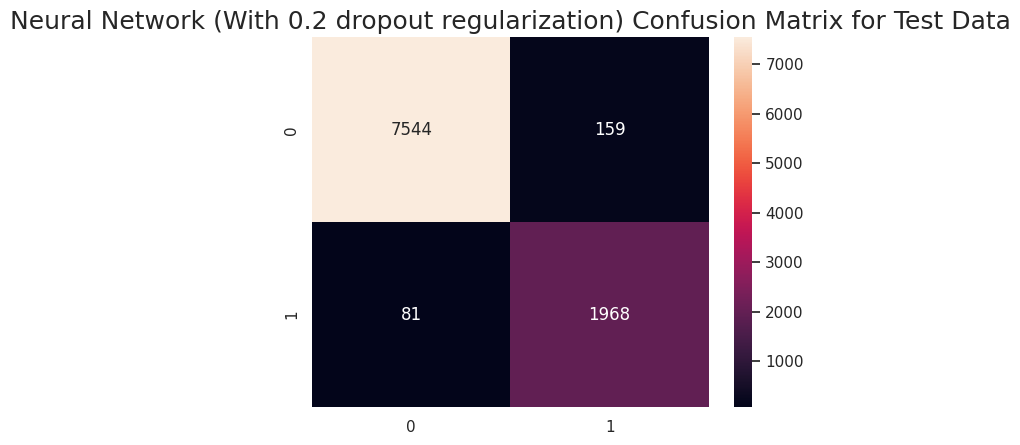

In [40]:
# NN (With 0.2 dropout regularization) Confusion Matrix
threshold = 0.6
y_pred = [1 if i >= threshold else 0 for i in model2.predict(X_test)]
plt.title("Neural Network (With 0.2 dropout regularization) Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

305/305 [==============================] - 0s 1ms/step


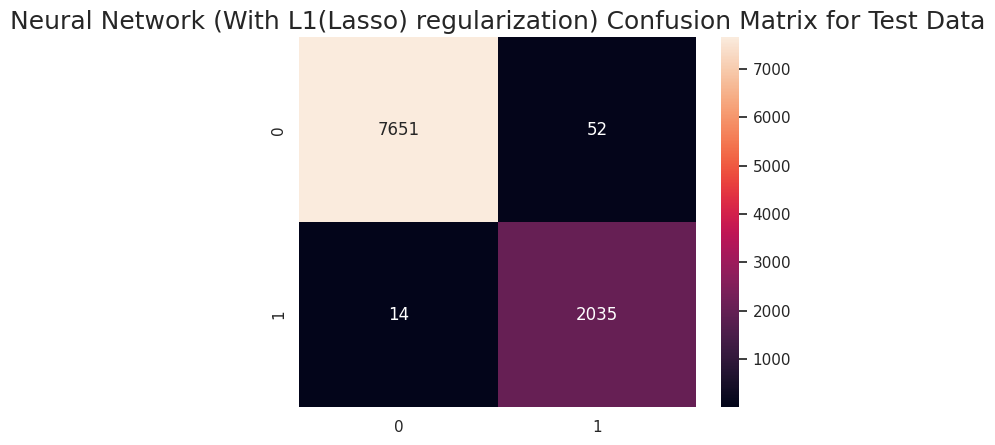

In [41]:
# NN (With L1(Lasso) regularization) Confusion Matrix
threshold = 0.6
y_pred = [1 if i >= threshold else 0 for i in model3.predict(X_test)]
plt.title("Neural Network (With L1(Lasso) regularization) Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

305/305 [==============================] - 0s 1ms/step


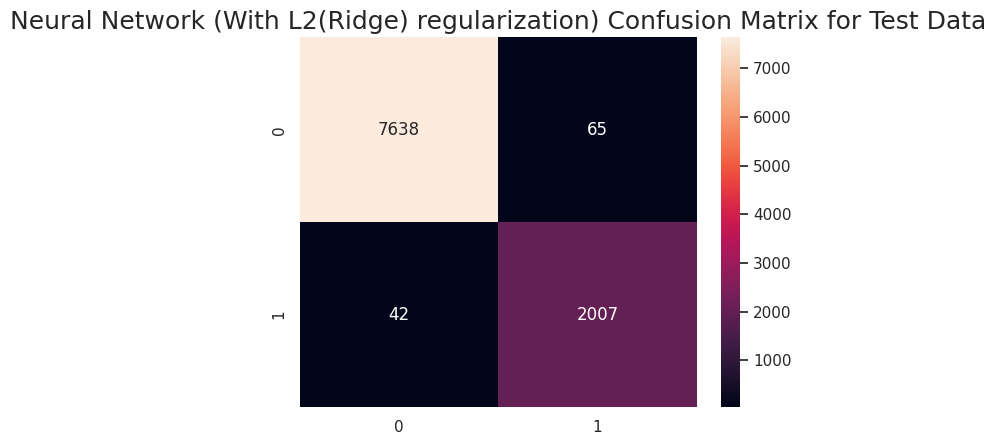

In [42]:
# NN (With L2(Ridge) regularization) Confusion Matrix
threshold = 0.6
y_pred = [1 if i >= threshold else 0 for i in model4.predict(X_test)]
plt.title("Neural Network (With L2(Ridge) regularization) Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

305/305 [==============================] - 0s 1ms/step


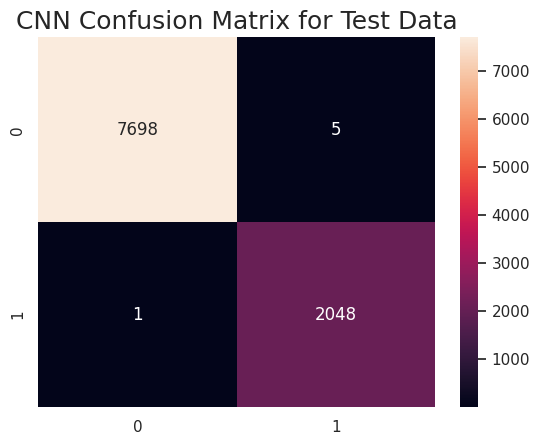

In [43]:
# CNN Confusion Matrix
test_pred_prob = model.predict(test_features)
test_pred = np.round(test_pred_prob)
plt.title("CNN Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(test_labels, test_pred), annot=True, fmt="d")

In [44]:
# RNN
X = [
    "date",
    "Temperature",
    "Humidity",
    "Light",
    "CO2",
    "HumidityRatio"
]

#2. Target variable is occupancy
y = [
    "Occupancy"
]

In [45]:
# Use pandas to load the data
import pandas as pd

training_file_path = "/content/sample_data/datatraining.txt"
test_file_path = "/content/sample_data/dataset.txt"
test2_file_path = "/content/sample_data/dataset2.txt"

# TRAINING DATA
print("***** TRAIN DATA *****")

col_names = ["date","Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"]
data_features = ["date","Temperature","Humidity","Light","CO2","HumidityRatio"]

train_data = pd.read_csv(training_file_path, skiprows=[0], names=col_names)
print(train_data.head())

#VALIDATION DATA
val_data = pd.read_csv(test_file_path, sep=",", skiprows=[0], header=None, names=col_names)

#TEST DATA
test_data = pd.read_csv(test2_file_path, sep=",", skiprows=[0], header=None, names=col_names)

***** TRAIN DATA *****
                  date  Temperature  Humidity  Light     CO2  HumidityRatio  \
1  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
3  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
4  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
5  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
1          1  
2          1  
3          1  
4          1  
5          1  


In [46]:
X_train_raw = train_data[data_features]
y_train = train_data.Occupancy
X_val_raw = val_data[data_features]
y_val = val_data.Occupancy
X_test_raw = test_data[data_features]
y_test = test_data.Occupancy

In [47]:
#### Function to create new features
from datetime import datetime


def create_new_features(data):
    time_buckets = []
    weekday = []

    for index, row in data.iterrows():
        parsed_date = datetime.strptime(row['date'], "%Y-%m-%d %H:%M:%S")
        time_bucket = parsed_date.hour % 4 # lets divide in to [day 6-12, afternoon 12-6, evening 6-12, night 12-6]
        time_buckets.append(time_bucket)
        wday = 0 if parsed_date.isoweekday() > 5 else 1
        weekday.append(wday)
    return time_buckets, weekday
    
train_time_buckets, train_weekday = create_new_features(train_data)
val_time_buckets, val_weekday = create_new_features(val_data)
test_time_buckets, test_weekday = create_new_features(test_data)

In [48]:
#Validation dataset did not have any values with occupancy 0. So we are adding one here
val_weekday[-1]=0 #dummy

In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def onehot_encode(values):
    new_values = np.array(values)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(new_values)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return (onehot_encoded, label_encoder.classes_)

## TRAINING DATA
train_time_bucket_onehot_encoded, train_time_class = onehot_encode(train_time_buckets)
train_weekday_onehot_encoded, train_weekday_class = onehot_encode(train_weekday)
print(train_time_bucket_onehot_encoded, train_time_class)
print(train_weekday_onehot_encoded, train_weekday_class)


## VALIDATION DATA
val_time_bucket_onehot_encoded, val_time_class = onehot_encode(val_time_buckets)
val_weekday_onehot_encoded, val_weekday_class = onehot_encode(val_weekday)
print(val_time_bucket_onehot_encoded, val_time_class)
print(val_weekday_onehot_encoded, val_weekday_class)

## TEST DATA

test_time_bucket_onehot_encoded, test_time_class = onehot_encode(test_time_buckets)
test_weekday_onehot_encoded, test_weekday_class = onehot_encode(test_weekday)
print(test_time_bucket_onehot_encoded, test_time_class)
print(test_weekday_onehot_encoded, test_weekday_class)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]] [0 1 2 3]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]] [0 1]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]] [0 1 2 3]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]] [0 1]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]] [0 1 2 3]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]] [0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to 

In [50]:
# Append new features to Train, Validation and Test sets

def add_new_features(arr, w_oh, t_oh):
    # lets ignore the date column for all the rows
    X = arr.values[:, 1:] 
    XW = np.hstack((X, w_oh))
    XTW = np.hstack((XW, t_oh))
    return XTW

X_train = add_new_features(X_train_raw, train_weekday_onehot_encoded, train_time_bucket_onehot_encoded)
X_train.shape

(8143, 11)

In [51]:
X_val = add_new_features(X_val_raw, val_weekday_onehot_encoded, val_time_bucket_onehot_encoded)

In [52]:
X_test = add_new_features(X_test_raw, test_weekday_onehot_encoded, test_time_bucket_onehot_encoded)

In [53]:
# find the number of positive occupancy
y_test.shape, sum(y_test), 1-sum(y_test)/(y_test.shape[0]*1.0)

((9752,), 2049, 0.7898892534864643)

In [54]:
pip install mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.3 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [55]:
# BASERNN Class 
# This code is copied from https://github.com/sunilmallya/timeseries/blob/master/sagemaker-timeseries/generic_ts.py

import mxnet as mx
import numpy as np
import math
from mxnet import nd, autograd

def detach(hidden):
    if isinstance(hidden, (tuple, list)):
        hidden = [i.detach() for i in hidden]
    else:
        hidden = hidden.detach()
    return hidden

class BaseRNNClassifier(mx.gluon.Block):
    '''
    Extensible RNN class with LSTM that can operate with MXNet NDArray iter or DataLoader.
    Includes fit() function to mimic the symbolic fit() function
    '''
    
    @classmethod
    def get_data(cls, batch, iter_type, ctx):
        ''' get data and label from the iterator/dataloader '''
        if iter_type == 'mxiter':
            X = batch.data[0].as_in_context(ctx)
            y = batch.label[0].as_in_context(ctx)
        elif iter_type in ["numpy", "dataloader"]:
            X = batch[0].as_in_context(ctx)
            y = batch[1].as_in_context(ctx)
        else:
            raise ValueError("iter_type must be mxiter or numpy")
        return X, y
    
    @classmethod
    def get_all_labels(cls, data_iterator, iter_type):
        if iter_type == 'mxiter':
            pass
        elif iter_type in ["numpy", "dataloader"]:
            return data_iterator._dataset._label
    
    def __init__(self, ctx):
        super(BaseRNNClassifier, self).__init__()
        self.ctx = ctx

    def build_model(self, n_out, rnn_size=128, n_layer=1):
        self.rnn_size = rnn_size
        self.n_layer = n_layer
        self.n_out = n_out
        
        # LSTM default; #TODO(Sunil): make this generic
        self.lstm = mx.gluon.rnn.LSTM(self.rnn_size, self.n_layer, layout='NTC')
        #self.lstm = mx.gluon.rnn.GRU(self.rnn_size, self.n_layer)
        self.output = mx.gluon.nn.Dense(self.n_out)

    def forward(self, x, hidden):
        out, hidden = self.lstm(x, hidden)
        out = out[:, out.shape[1]-1, :]
        out = self.output(out)
        return out, hidden

    def compile_model(self, loss=None, lr=3E-3):
        self.collect_params().initialize(mx.init.Xavier(), ctx=self.ctx)
        self.criterion = mx.gluon.loss.SoftmaxCrossEntropyLoss()
        self.loss = mx.gluon.loss.SoftmaxCrossEntropyLoss() if loss is None else loss
        self.lr = lr
        self.optimizer = mx.gluon.Trainer(self.collect_params(), 'adam', 
                                          {'learning_rate': self.lr})

    def top_k_acc(self, data_iterator, iter_type='mxiter', top_k=3, batch_size=128):
        batch_pred_list = []
        true_labels = []
        init_state = mx.nd.zeros((self.n_layer, batch_size, self.rnn_size), self.ctx)
        hidden = [init_state] * 2
        for i, batch in enumerate(data_iterator):
            data, label = BaseRNNClassifier.get_data(batch, iter_type, self.ctx)
            batch_pred = self.forward(data, hidden)
            #batch_pred = mx.nd.argmax(batch_pred, axis=1)
            batch_pred_list.append(batch_pred.asnumpy())
            true_labels.append(label)
        y = np.vstack(batch_pred_list)
        true_labels = np.vstack(true_labels)
        argsorted_y = np.argsort(y)[:,-top_k:]
        return np.asarray(np.any(argsorted_y.T == true_labels, axis=0).mean(dtype='f'))
    
    def evaluate_accuracy(self, data_iterator, metric='acc', iter_type='mxiter', batch_size=128):
        met = mx.metric.Accuracy()
        init_state = mx.nd.zeros((self.n_layer, batch_size, self.rnn_size), self.ctx)
        hidden = [init_state] * 2
        for i, batch in enumerate(data_iterator):
            data, label = BaseRNNClassifier.get_data(batch, iter_type, self.ctx)
            # Lets do a forward pass only!
            output, hidden = self.forward(data, hidden)
            preds = mx.nd.argmax(output, axis=1)
            met.update(labels=label, preds=preds)
                
        #if self.all_labels is None:
        #    self.all_labels = BaseRNNClassifier.get_all_labels(data_iterator, iter_type)
        #preds = self.predict(data_iterator, iter_type=iter_type, batch_size=batch_size)
        #met.update(labels=mx.nd.array(self.all_labels[:len(preds)]), preds=preds)
        
        return met.get()                   
                    
    def predict(self, data_iterator, iter_type='mxiter', batch_size=128):
        batch_pred_list = []
        init_state = mx.nd.zeros((self.n_layer, batch_size, self.rnn_size), self.ctx)
        hidden = [init_state] * 2
        for i, batch in enumerate(data_iterator):
            data, label = BaseRNNClassifier.get_data(batch, iter_type, self.ctx)
            output, hidden = self.forward(data, hidden)
            batch_pred_list.append(output.asnumpy())
        #return np.vstack(batch_pred_list)
        return np.argmax(np.vstack(batch_pred_list), 1)
    
    def fit(self, train_data, test_data, epochs, batch_size, verbose=True):
        '''
        @train_data:  can be of type list of Numpy array, DataLoader, MXNet NDArray Iter
        '''
        
        moving_loss = 0.
        total_batches = 0

        train_loss = []
        train_acc = []
        test_acc = []

        iter_type = 'numpy'
        train_iter = None
        test_iter = None
        print("Data type:", type(train_data), type(test_data), iter_type, type(train_data[0]))
        
        # Can take MX NDArrayIter, or DataLoader
        if isinstance(train_data, mx.io.NDArrayIter):
            train_iter = train_data
            test_iter = test_data
            iter_type = 'mxiter'
            #total_batches = train_iter.num_data // train_iter.batch_size

        elif isinstance(train_data, list):
            if True: #dummy
            #if isinstance(train_data[0], np.ndarray) and isinstance(train_data[1], np.ndarray):
                X, y = np.asarray(train_data[0]).astype('float32'), np.asarray(train_data[1]).astype('float32')
                tX, ty = np.asarray(test_data[0]).astype('float32'), np.asarray(test_data[1]).astype('float32')
                
                total_batches = X.shape[0] // batch_size
                train_iter = mx.gluon.data.DataLoader(mx.gluon.data.ArrayDataset(X, y), 
                                    batch_size=batch_size, shuffle=True, last_batch='discard')
                test_iter = mx.gluon.data.DataLoader(mx.gluon.data.ArrayDataset(tX, ty), 
                                    batch_size=batch_size, shuffle=False, last_batch='discard')
                
        elif isinstance(train_data, mx.gluon.data.dataloader.DataLoader) and isinstance(test_data, mx.gluon.data.dataloader.DataLoader):
            train_iter = train_data
            test_iter = test_data
            total_batches = len(train_iter)
        else:
            raise ValueError("pass mxnet ndarray or numpy array as [data, label]")

        print("Data type:", type(train_data), type(test_data), iter_type)
        print("Sizes", self.n_layer, batch_size, self.rnn_size, self.ctx)
        
        for e in range(epochs):
            #print self.lstm.collect_params()

            # reset iterators if of MXNet Itertype
            if iter_type == "mxiter":
                train_iter.reset()
                test_iter.reset()
        
            init_state = mx.nd.zeros((self.n_layer, batch_size, self.rnn_size), self.ctx)
            hidden = [init_state] * 2                
            #hidden = self.begin_state(func=mx.nd.zeros, batch_size=batch_size, ctx=self.ctx)
            yhat = []
            for i, batch in enumerate(train_iter):
                data, label = BaseRNNClassifier.get_data(batch, iter_type, self.ctx)
                #print "Data Shapes:", data.shape, label.shape
                hidden = detach(hidden)
                with mx.autograd.record(train_mode=True):
                    preds, hidden = self.forward(data, hidden)
                    #print preds[0].shape, hidden[0].shape, label.shape
                    loss = self.loss(preds, label) 
                    yhat.extend(preds)
                loss.backward()                                        
                self.optimizer.step(batch_size)
                preds = mx.nd.argmax(preds, axis=1)
                
                batch_acc = mx.nd.mean(preds == label).asscalar()

                if i == 0:
                    moving_loss = nd.mean(loss).asscalar()
                else:
                    moving_loss = .99 * moving_loss + .01 * mx.nd.mean(loss).asscalar()
                    
                if verbose and i%100 == 0:
                    print('[Epoch {}] [Batch {}/{}] Loss: {:.5f}, Batch acc: {:.5f}'.format(
                          e, i, total_batches, moving_loss, batch_acc))                    
                    
            train_loss.append(moving_loss)
            
            t_acc = self.evaluate_accuracy(train_iter, iter_type=iter_type, batch_size=batch_size)
            train_acc.append(t_acc[1])
            
            tst_acc = self.evaluate_accuracy(test_iter, iter_type=iter_type, batch_size=batch_size)
            test_acc.append(tst_acc[1])

            print("Epoch %s. Loss: %.5f Train Acc: %s Test Acc: %s" % (e, moving_loss, t_acc, tst_acc))
        return train_loss, train_acc, test_acc
                    
    def predict(self, data_iterator, iter_type='mxiter', batch_size=128):
        batch_pred_list = []
        init_state = mx.nd.zeros((self.n_layer, batch_size, self.rnn_size), self.ctx)
        hidden = [init_state] * 2
        for i, batch in enumerate(data_iterator):
            data, label = BaseRNNClassifier.get_data(batch, iter_type, self.ctx)
            output, hidden = self.forward(data, hidden)
            batch_pred_list.append(output.asnumpy())
        return np.argmax(np.vstack(batch_pred_list), 1)

In [56]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((8143, 11), (8143,), (2665, 11), (2665,))

In [57]:
# Expand dimensions

# RNNs take inputs as (batch_size, time step or step_size or sequence_length, features)
X_train = np.expand_dims(X_train, axis=1)

X_val = np.expand_dims(X_val, axis=1)
X_test = np.expand_dims(X_test, axis=1)

In [58]:
N_CLASS = 2

ctx = mx.cpu(0) #change context to execute on CPU
model = BaseRNNClassifier(ctx)
model.build_model(n_out=N_CLASS, rnn_size=8, n_layer=1)
model.compile_model()

#train_loss, train_acc, test_acc = model.fit([X_train[1:], y_train[1:]], [X_test, y_test], batch_size=32, epochs=25)

#train_loss, train_acc, test_acc = model.fit([X_train, y_train], [X_val, y_val], batch_size=32, epochs=4)
train_loss, train_acc, test_acc = model.fit([X_train, y_train], [X_test, y_test], batch_size=32, epochs=10)

Data type: <class 'list'> <class 'list'> numpy <class 'numpy.ndarray'>
Data type: <class 'list'> <class 'list'> numpy
Sizes 1 32 8 cpu(0)
[Epoch 0] [Batch 0/254] Loss: 0.69406, Batch acc: 0.56250
[Epoch 0] [Batch 100/254] Loss: 0.53641, Batch acc: 0.81250
[Epoch 0] [Batch 200/254] Loss: 0.43885, Batch acc: 0.81250
Epoch 0. Loss: 0.39437 Train Acc: ('accuracy', 0.7875246062992126) Test Acc: ('accuracy', 0.790296052631579)
[Epoch 1] [Batch 0/254] Loss: 0.38737, Batch acc: 0.71875
[Epoch 1] [Batch 100/254] Loss: 0.34212, Batch acc: 0.75000
[Epoch 1] [Batch 200/254] Loss: 0.29966, Batch acc: 0.81250
Epoch 1. Loss: 0.27953 Train Acc: ('accuracy', 0.9550935039370079) Test Acc: ('accuracy', 0.9571340460526315)
[Epoch 2] [Batch 0/254] Loss: 0.15196, Batch acc: 1.00000
[Epoch 2] [Batch 100/254] Loss: 0.20511, Batch acc: 0.93750
[Epoch 2] [Batch 200/254] Loss: 0.19814, Batch acc: 1.00000
Epoch 2. Loss: 0.18717 Train Acc: ('accuracy', 0.9774852362204725) Test Acc: ('accuracy', 0.9764597039473685)

In [59]:
b_size = 24
tX, ty = np.asarray(X_test).astype('float32'), np.asarray(y_test).astype('float32')
test_iter = mx.gluon.data.DataLoader(mx.gluon.data.ArrayDataset(tX, ty),  batch_size=b_size, shuffle=False, last_batch='discard')
pred_out = model.predict(test_iter, iter_type="dataloader", batch_size=b_size)

In [60]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test[:len(pred_out)], pred_out))

[[7703    0]
 [2041    0]]


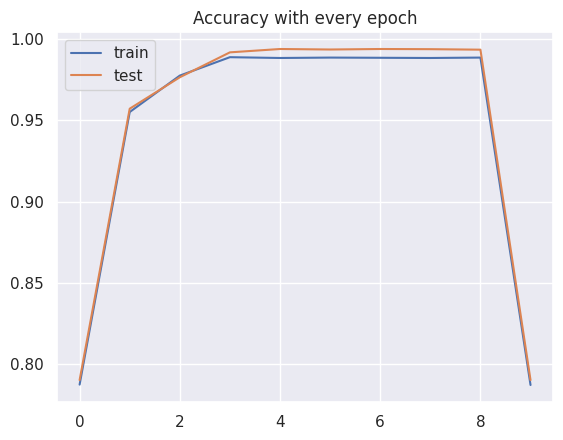

In [61]:
import matplotlib.pyplot as plt

plt.title("Accuracy with every epoch")
plt.plot(train_acc, label="train")
plt.plot(test_acc, label ="test")
plt.legend()
plt.show()

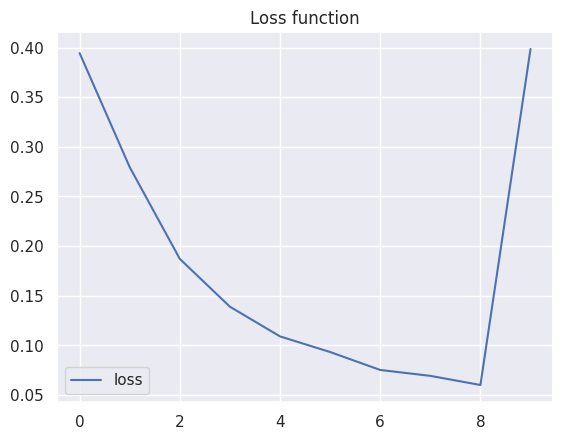

In [62]:
plt.title("Loss function")
plt.plot(train_loss, label="loss")
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# RNN Accuracy

import mxnet as mx
import numpy as np
import math
from mxnet import nd, autograd

N_CLASS = 2
ctx = mx.cpu()
net = mx.gluon.nn.Dense(N_CLASS)

#INIT
net.collect_params().initialize(mx.init.Normal(sigma=1.), ctx=ctx)
softmax_cross_entropy_loss = mx.gluon.loss.SoftmaxCrossEntropyLoss()

trainer = mx.gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

## accuracy function
def evaluate_accuracy(t_data, t_label, net, ctx=mx.cpu()):
    num_correct = 0.0
    num_total = len(t_data)
    batch_size = 32
    n_batches = num_total // batch_size
    acc = mx.metric.Accuracy()

    for i in range(n_batches):
        data = mx.nd.array(t_data[i*batch_size:(i+1)*batch_size])
        label = mx.nd.array(t_label[i*batch_size:(i+1)*batch_size])
        data = data.as_in_context(ctx)
        label = label.as_in_context(ctx)
        output = net(data)
        predictions = nd.argmax(output, axis=1)
        acc.update(preds=predictions, labels=label)
    return acc.get()[1]
###

epochs = 50
moving_loss = 0.

batch_size = 32
n_batches = len(X_train)//batch_size
loss_sequence = []
total_accuracy = 0

for e in range(epochs):
    cumulative_loss = 0
    for i in range(n_batches):
        data = mx.nd.array(X_train[i*batch_size:(i+1)*batch_size])
        label = mx.nd.array(y_train[i*batch_size:(i+1)*batch_size])
        data = data.as_in_context(ctx)
        label = label.as_in_context(ctx)
        
        # Step1. Lets do the forward pass
        with mx.autograd.record():
            output = net(data)
            
            # Step2. Compute the Loss
            loss = softmax_cross_entropy_loss(output, label)
            
        # Step3. Do the backward pass, update the weights    
        loss.backward()
        trainer.step(batch_size)
        cumulative_loss += nd.sum(loss).asscalar()
    
    loss_sequence.append(cumulative_loss)
    #print e, cumulative_loss
    
    # Step4. Compute the test accuracy
    test_accuracy = evaluate_accuracy(X_test, y_test, net)
    train_accuracy = evaluate_accuracy(X_train, y_train, net)

    total_accuracy += test_accuracy
        
    print("Train Accuracy:", train_accuracy, "Test Accuracy:", test_accuracy)
rnn_accuracy = total_accuracy / epochs


Train Accuracy: 0.9144931102362205 Test Accuracy: 0.9181743421052632
Train Accuracy: 0.9140009842519685 Test Accuracy: 0.9158100328947368
Train Accuracy: 0.9144931102362205 Test Accuracy: 0.9181743421052632
Train Accuracy: 0.9144931102362205 Test Accuracy: 0.9181743421052632
Train Accuracy: 0.8372293307086615 Test Accuracy: 0.8753083881578947
Train Accuracy: 0.9167076771653543 Test Accuracy: 0.9498355263157895
Train Accuracy: 0.9251968503937008 Test Accuracy: 0.9359580592105263
Train Accuracy: 0.9181840551181102 Test Accuracy: 0.9255756578947368
Train Accuracy: 0.9184301181102362 Test Accuracy: 0.927014802631579
Train Accuracy: 0.812253937007874 Test Accuracy: 0.8609169407894737
Train Accuracy: 0.9106791338582677 Test Accuracy: 0.9091282894736842
Train Accuracy: 0.9235974409448819 Test Accuracy: 0.9334909539473685
Train Accuracy: 0.8797982283464567 Test Accuracy: 0.8791118421052632
Train Accuracy: 0.9162155511811023 Test Accuracy: 0.9224917763157895
Train Accuracy: 0.9165846456692913 T

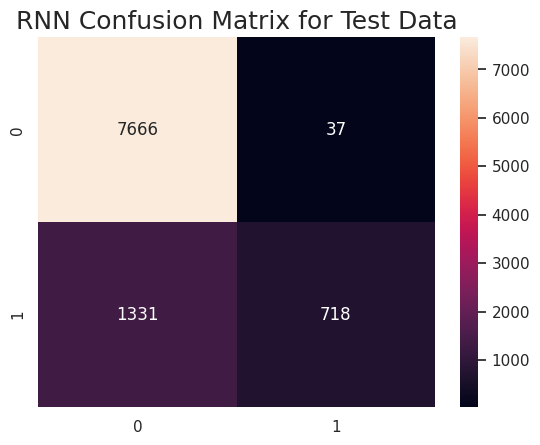

In [64]:
#RNN Confusion Matrix

# Confusion Matrix for Test Data
plt.title("RNN Confusion Matrix for Test Data", fontdict={'fontsize':18})
rnn_predict_test = np.argmax(net(mx.nd.array(X_test).as_in_context(ctx)).asnumpy(), axis=1)
ax = sns.heatmap(confusion_matrix(y_test, rnn_predict_test), annot=True, fmt="d")
plt.show()

In [65]:
pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
# LSTM model

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from colorama import Fore, Style


def train_lstm_model(datatraining_file, datatest_file, datatest2_file, batch_size, dropout_rate, learning_rate, epochs):
    # Read the datasets
    datatest = pd.read_csv(datatest_file)
    datatest2 = pd.read_csv(datatest2_file)
    datatraining = pd.read_csv(datatraining_file)

    # Split the data
    X_train = datatraining.drop(columns=['date', 'Occupancy'], axis=1)
    y_train = datatraining['Occupancy']
    X_validation = datatest.drop(columns=['date', 'Occupancy'], axis=1)
    y_validation = datatest['Occupancy']
    X_test = datatest2.drop(columns=['date', 'Occupancy'], axis=1)
    y_test = datatest2['Occupancy']

    # Convert the data to numpy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_validation = np.array(X_validation)
    y_validation = np.array(y_validation)
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # Reshape the data for LSTM input [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_validation = np.reshape(X_validation, (X_validation.shape[0], X_validation.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_validation, y_validation))

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred).flatten()

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)

    return f1


datatraining_file = "/content/sample_data/datatraining.txt"
datatest_file = "/content/sample_data/dataset.txt"
datatest2_file = "/content/sample_data/dataset2.txt"

batch_size = [32, 64, 128]
dropout_rate = [0.2, 0.3, 0.5]
learning_rate = [0.0001, 0.001]
epochs = 10  # Set the number of epochs


results = []

best_lstm_f1_score = 0.0
best_hyperparameters = {}
best_lstm_y_pred = None
best_lstm_y_test = None

for bs in batch_size:
    for dr in dropout_rate:
        for lr in learning_rate:
            f1 = train_lstm_model(datatraining_file, datatest_file, datatest2_file, bs, dr, lr, epochs)
            hyperparameters = {'Batch Size': bs, 'Dropout Rate': dr, 'Learning Rate': lr}
            result_row = [bs, dr, lr, f1]
            results.append(result_row)

            if f1 > best_lstm_f1_score:
                best_lstm_f1_score = f1
                best_hyperparameters = hyperparameters
                best_lstm_y_pred = y_pred
                best_lstm_y_test = y_test


table_headers = ["Batch Size", "Dropout Rate", "Learning Rate", "F1 Score"]
sorted_results = sorted(results, key=lambda x: x[3], reverse=True)

table = []
for row in sorted_results:
    if row[3] == best_lstm_f1_score:
        table.append([Fore.RED + str(cell) + Style.RESET_ALL for cell in row])
    else:
        table.append(row)

formatted_table = tabulate(table, headers=table_headers, floatfmt=".4f", tablefmt="github")

print(formatted_table)
print("Best LSTM F1 Score:", best_lstm_f1_score)
print("Best LSTM Hyperparameters:", best_hyperparameters)

# Assign best y_pred and y_test to variables
best_lstm_y_pred_2 = best_lstm_y_pred
best_lstm_y_test_2 = best_lstm_y_test


Epoch 1/10
255/255 [==============================] - 12s 26ms/step - loss: 0.4033 - accuracy: 0.8058 - val_loss: 0.2205 - val_accuracy: 0.9516
Epoch 2/10
255/255 [==============================] - 7s 28ms/step - loss: 0.0863 - accuracy: 0.9832 - val_loss: 0.0931 - val_accuracy: 0.9704
Epoch 3/10
255/255 [==============================] - 6s 24ms/step - loss: 0.0536 - accuracy: 0.9876 - val_loss: 0.0940 - val_accuracy: 0.9704
Epoch 4/10
255/255 [==============================] - 8s 32ms/step - loss: 0.0500 - accuracy: 0.9882 - val_loss: 0.0863 - val_accuracy: 0.9711
Epoch 5/10
255/255 [==============================] - 6s 26ms/step - loss: 0.0486 - accuracy: 0.9881 - val_loss: 0.0869 - val_accuracy: 0.9704
Epoch 6/10
255/255 [==============================] - 8s 31ms/step - loss: 0.0479 - accuracy: 0.9881 - val_loss: 0.0857 - val_accuracy: 0.9741
Epoch 7/10
255/255 [==============================] - 7s 26ms/step - loss: 0.0481 - accuracy: 0.9876 - val_loss: 0.0890 - val_accuracy: 0.970

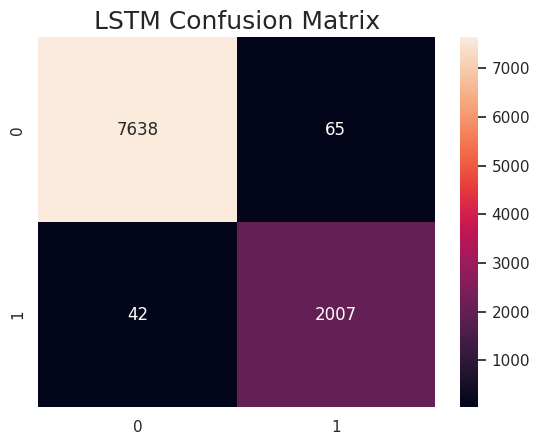

In [67]:
# LSTM Confusion Matrix
plt.title("LSTM Confusion Matrix", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(best_lstm_y_test_2, best_lstm_y_pred_2), annot=True, fmt="d")

In [68]:
# GRU model

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from colorama import Fore, Style


def train_gru_model(datatraining_file, datatest_file, datatest2_file, batch_size, dropout_rate, learning_rate, epochs):
    # Read the datasets
    datatest = pd.read_csv(datatest_file)
    datatest2 = pd.read_csv(datatest2_file)
    datatraining = pd.read_csv(datatraining_file)

    # Split the data
    X_train = datatraining.drop(columns=['date', 'Occupancy'], axis=1)
    y_train = datatraining['Occupancy']
    X_validation = datatest.drop(columns=['date', 'Occupancy'], axis=1)
    y_validation = datatest['Occupancy']
    X_test = datatest2.drop(columns=['date', 'Occupancy'], axis=1)
    y_test = datatest2['Occupancy']

    # Convert the data to numpy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_validation = np.array(X_validation)
    y_validation = np.array(y_validation)
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # Reshape the data for GRU input [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_validation = np.reshape(X_validation, (X_validation.shape[0], X_validation.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Define the GRU model
    model = Sequential()
    model.add(GRU(128, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_validation, y_validation))

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred).flatten()

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)

    return f1

datatraining_file = "/content/sample_data/datatraining.txt"
datatest_file = "/content/sample_data/dataset.txt"
datatest2_file = "/content/sample_data/dataset2.txt"

batch_size = [32, 64, 128]
dropout_rate = [0.2, 0.3, 0.5]
learning_rate = [0.0001, 0.001]
epochs = 10  # Set the number of epochs

results = []

best_gru_f1_score = 0.0
best_hyperparameters = {}
best_gru_y_pred = None
best_gru_y_test = None

for bs in batch_size:
    for dr in dropout_rate:
        for lr in learning_rate:
            f1 = train_gru_model(datatraining_file, datatest_file, datatest2_file, bs, dr, lr, epochs)
            hyperparameters = {'Batch Size': bs, 'Dropout Rate': dr, 'Learning Rate': lr}
            result_row = [bs, dr, lr, f1]
            results.append(result_row)

            if f1 > best_gru_f1_score:
                best_gru_f1_score = f1
                best_hyperparameters = hyperparameters
                best_gru_y_pred = y_pred
                best_gru_y_test = y_test

table_headers = ["Batch Size", "Dropout Rate", "Learning Rate", "F1 Score"]
sorted_results = sorted(results, key=lambda x: x[3], reverse=True)

table = []
for row in sorted_results:
    if row[3] == best_gru_f1_score:
        table.append([Fore.RED + str(cell) + Style.RESET_ALL for cell in row])
    else:
        table.append(row)

formatted_table = tabulate(table, headers=table_headers, floatfmt=".4f", tablefmt="github")

print(formatted_table)
print("Best GRU F1 Score:", best_gru_f1_score)
print("Best GRU Hyperparameters:", best_hyperparameters)

# Assign best y_pred and y_test to variables
best_gru_y_pred_2 = best_gru_y_pred
best_gru_y_test_2 = best_gru_y_test

Epoch 1/10
255/255 [==============================] - 11s 29ms/step - loss: 0.3438 - accuracy: 0.8369 - val_loss: 0.2020 - val_accuracy: 0.9512
Epoch 2/10
255/255 [==============================] - 7s 29ms/step - loss: 0.1404 - accuracy: 0.9573 - val_loss: 0.1123 - val_accuracy: 0.9644
Epoch 3/10
255/255 [==============================] - 5s 20ms/step - loss: 0.0795 - accuracy: 0.9792 - val_loss: 0.1000 - val_accuracy: 0.9647
Epoch 4/10
255/255 [==============================] - 7s 26ms/step - loss: 0.0596 - accuracy: 0.9838 - val_loss: 0.0905 - val_accuracy: 0.9689
Epoch 5/10
255/255 [==============================] - 7s 26ms/step - loss: 0.0532 - accuracy: 0.9861 - val_loss: 0.0886 - val_accuracy: 0.9659
Epoch 6/10
255/255 [==============================] - 7s 28ms/step - loss: 0.0493 - accuracy: 0.9880 - val_loss: 0.0867 - val_accuracy: 0.9704
Epoch 7/10
255/255 [==============================] - 7s 27ms/step - loss: 0.0487 - accuracy: 0.9881 - val_loss: 0.0851 - val_accuracy: 0.976

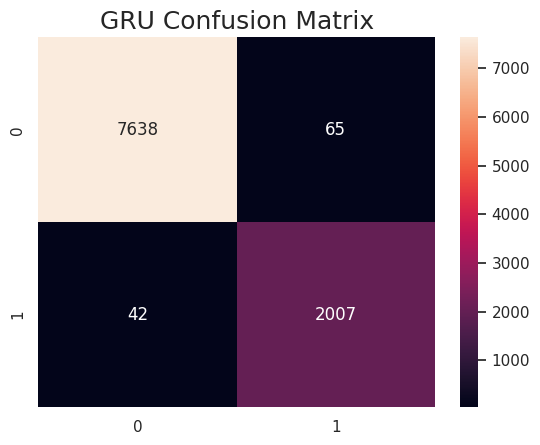

In [69]:
# GRU Confusion Matrix
plt.title("GRU Confusion Matrix", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(best_gru_y_test_2, best_gru_y_pred_2), annot=True, fmt="d")

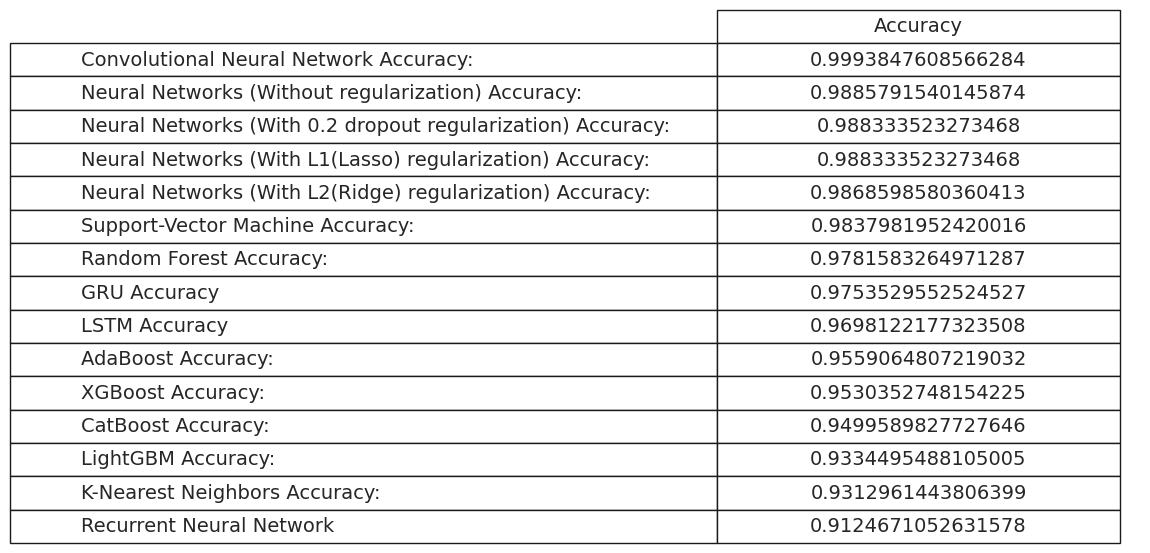

In [70]:
# Comparing Performances
accuracy_dict = {'K-Nearest Neighbors Accuracy:': knn_accuracy_test,
                 'Support-Vector Machine Accuracy:': svm_accuracy_test,
                 'Random Forest Accuracy:': rf_accuracy_test,
                 'AdaBoost Accuracy:': ab_accuracy_test,
                 'CatBoost Accuracy:': cat_accuracy_test,
                 'XGBoost Accuracy:': xgb_accuracy_test,
                 'LightGBM Accuracy:': lightgbm_accuracy_test,
                 'Neural Networks (Without regularization) Accuracy:': history1.history['accuracy'][-1],
                 'Neural Networks (With 0.2 dropout regularization) Accuracy:': history2.history['accuracy'][-1],
                 'Neural Networks (With L1(Lasso) regularization) Accuracy:': history3.history['accuracy'][-1],
                 'Neural Networks (With L2(Ridge) regularization) Accuracy:': history4.history['accuracy'][-1],
                 'Convolutional Neural Network Accuracy:': cnn_test_acc,
                 'Recurrent Neural Network' : rnn_accuracy,
                 'LSTM Accuracy' : best_lstm_f1_score,
                 'GRU Accuracy' : best_gru_f1_score
                 }           

accuracy_dict = dict(sorted(accuracy_dict.items(), key=lambda x: x[1], reverse=True))
df = pd.DataFrame.from_dict(accuracy_dict, orient='index', columns=['Accuracy'])
fig, ax = plt.subplots(figsize=(13, 5))
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, cellLoc='center', loc='center right')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(0.4, 2)
ax.axis('off')
plt.show()